In [28]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from dataclasses import dataclass,field
import copy
from scipy import optimize
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,plot_confusion_matrix

In [607]:
#Loading data
data= pd.read_excel("default of credit card clients.xls",header=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
raw_data=copy.deepcopy(data)

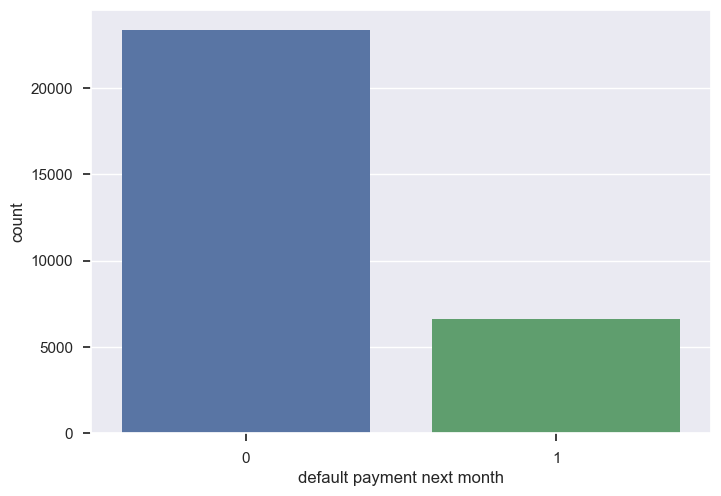

In [31]:
#Plotting distribution of the class variable 

sns.countplot(x='default payment next month',data=data)

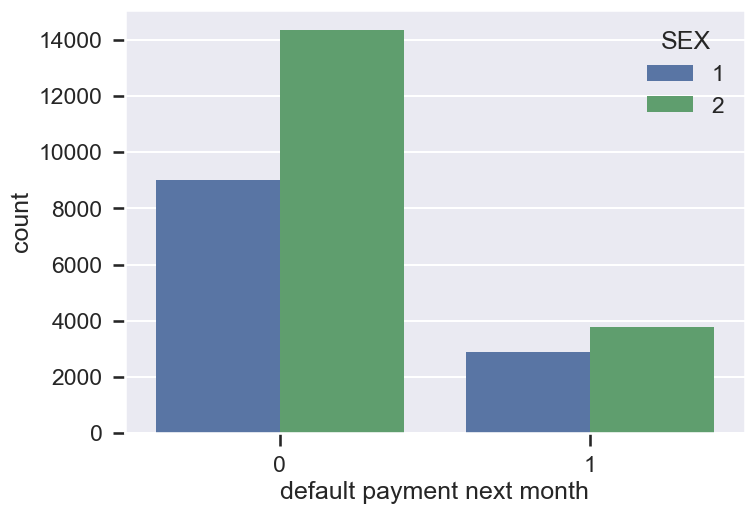

In [603]:
#Plotting distribution of the class variable 

sns.countplot(x='default payment next month',data=data, hue="SEX")

In [560]:
print('Default % of men ', data[data['SEX']==1]['default payment next month'].sum()/len(data[data['SEX']==1]))
print('Default % of women ', data[data['SEX']==2]['default payment next month'].sum()/len(data[data['SEX']==2]))

Default % of men  0.2416722745625841
Default % of women  0.20776280918727916


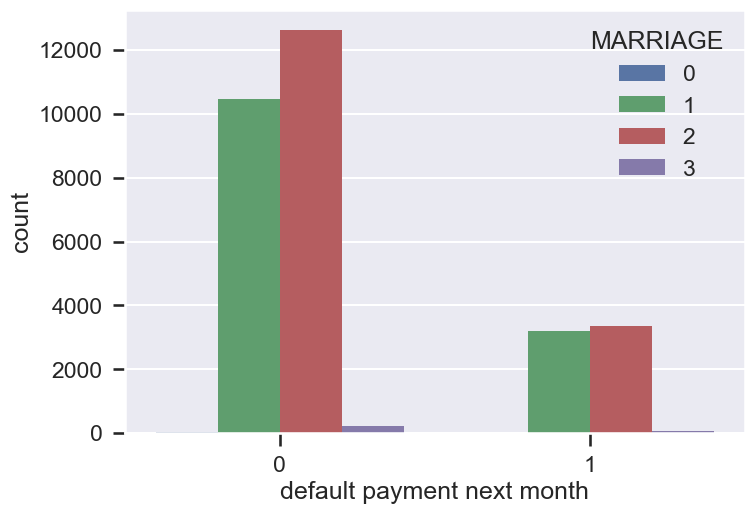

In [561]:
sns.countplot(x='default payment next month',data=data, hue="MARRIAGE")

###### It can be seen that married clients have a higher defaulting ratio

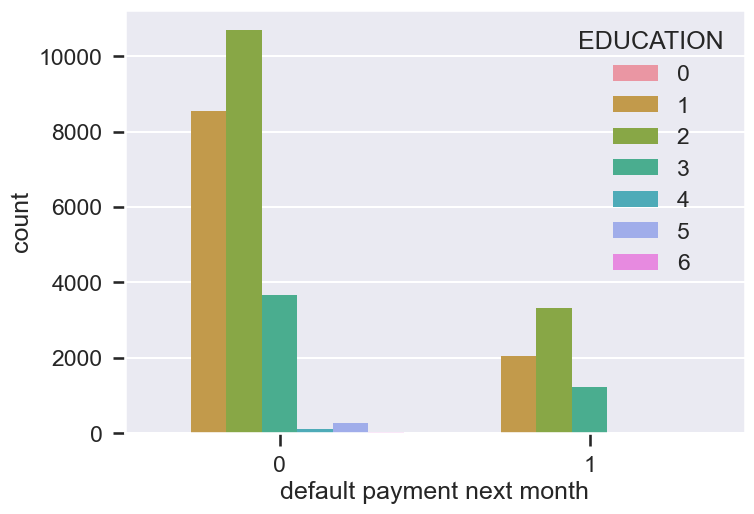

In [563]:
sns.countplot(x='default payment next month',data=data, hue="EDUCATION")

In [570]:
print('Default % of Graduate ', data[data['EDUCATION']==1]['default payment next month'].sum()/len(data[data['EDUCATION']==1]))
print('Default % of University ', data[data['EDUCATION']==2]['default payment next month'].sum()/len(data[data['EDUCATION']==2]))
print('Default % of High School ', data[data['EDUCATION']==3]['default payment next month'].sum()/len(data[data['EDUCATION']==3]))


Default % of Graduate  0.19234766178554558
Default % of University  0.23734853884533144
Default % of High School  0.2515761643278422


##### High-schoolers have a higher prpbability of defaulting

### Splitting the dataset into Categorical and Numerical variables subsets - For further analysis

In [608]:
#Continuous dataset
data_cont= data[['ID','LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
data_cont.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


#### Check for multi-colinearity

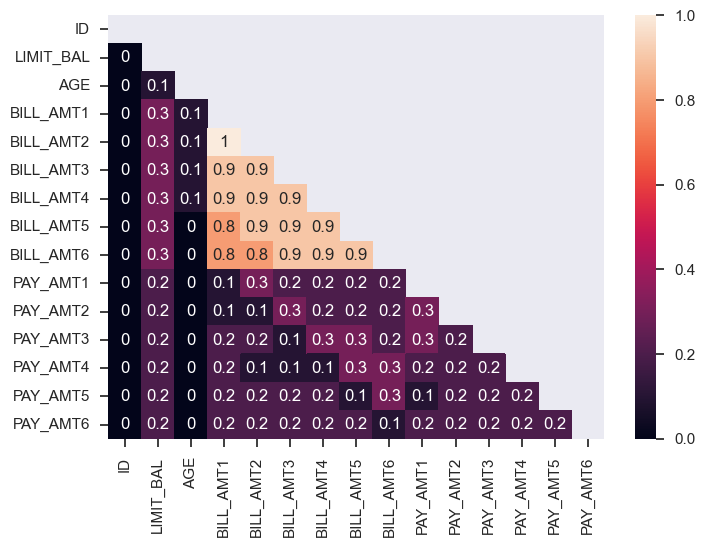

In [33]:
corr = data_cont.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
ax = sns.heatmap(round(corr,1), annot=True);


#### Its can be seen that new variables have very high correlation 

##### Remove columns BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 as they have high correlation to column BILL_AMT1 . This could lead to multi-colinearity and duplication of data 

In [609]:
#dropping columns 
data=data.drop(columns=['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=0)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679,0


#### Boxplots for continuous variables 

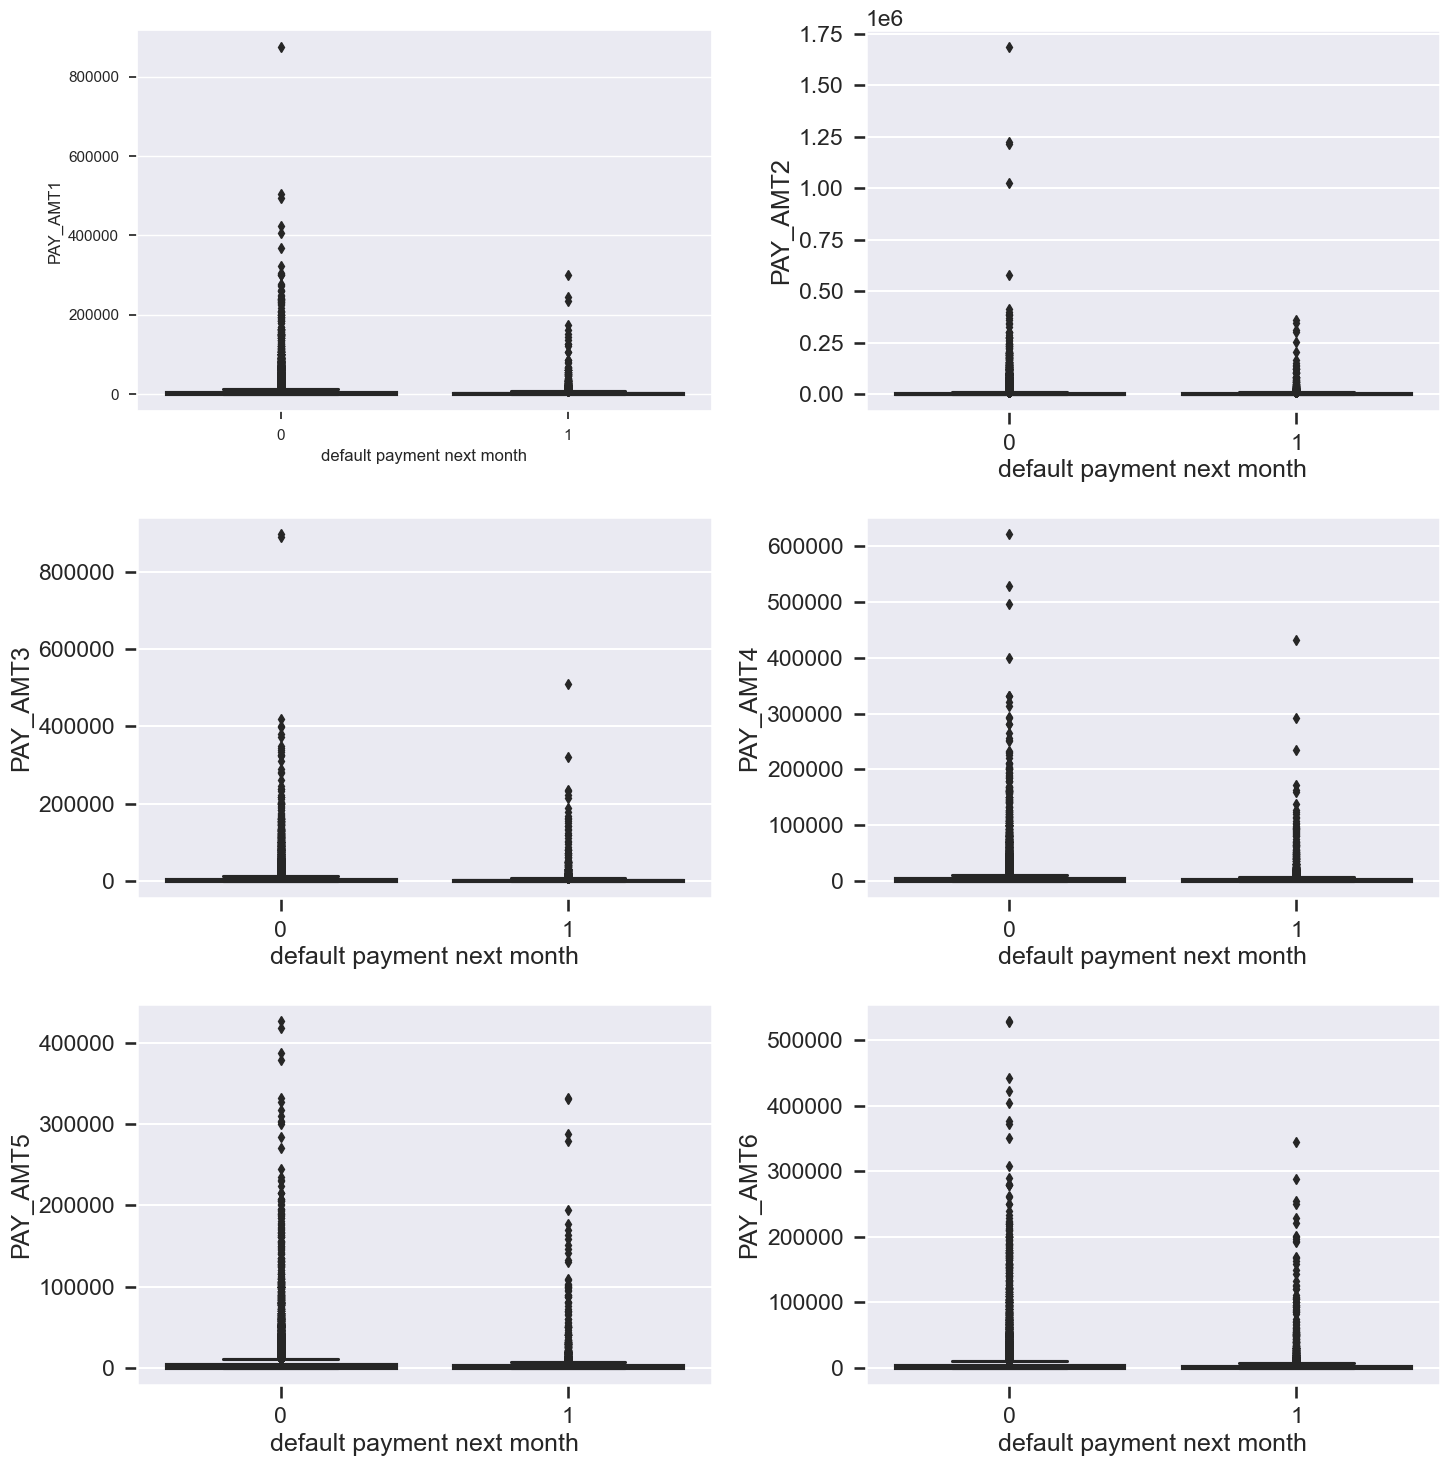

In [35]:
oe=['r','g']
fig = plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT1",x='default payment next month',palette=oe)


plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT2",x='default payment next month',palette=oe)


plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT3",x='default payment next month',palette=oe)


plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT4",x='default payment next month',palette=oe)


plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT5",x='default payment next month',palette=oe)

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT6",x='default payment next month',palette=oe)
plt.show()

###### It can be seen that, the data has a lot of outliers

#### Checking for missing values   : 
###### No missing values

In [36]:
## check for missing values : No missing values
data.isnull().values.any()

False

### Categorical variables 

In [37]:
data_categorical= data[['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',]]
data_categorical.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,1,2,2,-1,-1,-2,-2
1,2,2,2,-1,2,0,0,0,2
2,2,2,2,0,0,0,0,0,0
3,2,2,1,0,0,0,0,0,0
4,1,2,1,-1,0,-1,0,0,0


### Detemrine unique values in each of the  categorical variables

In [38]:

k= [i for i in data_categorical.columns]
for i in k : 
    print('Unique values in categorical variable ', i , 'are' , set (data_categorical[i]))
    

Unique values in categorical variable  SEX are {1, 2}
Unique values in categorical variable  EDUCATION are {0, 1, 2, 3, 4, 5, 6}
Unique values in categorical variable  MARRIAGE are {0, 1, 2, 3}
Unique values in categorical variable  PAY_0 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}
Unique values in categorical variable  PAY_2 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}
Unique values in categorical variable  PAY_3 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}
Unique values in categorical variable  PAY_4 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}
Unique values in categorical variable  PAY_5 are {0, 2, 3, 4, 5, 6, 7, 8, -1, -2}
Unique values in categorical variable  PAY_6 are {0, 2, 3, 4, 5, 6, 7, 8, -1, -2}


### Count of unqiue values for each variable 

In [39]:
data_categorical= data[['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',]]
k= [i for i in data_categorical.columns]
for i in k : 
    print('Unique values in categorical variable ', i , 'are' , set (data_categorical[i]))
    print ('\n')
    print ('And the count of unique elements for this variable are ')
    print (data_categorical[i].value_counts())
    print ('\n')
    print ('-----------------------------')
    

Unique values in categorical variable  SEX are {1, 2}


And the count of unique elements for this variable are 
2    18112
1    11888
Name: SEX, dtype: int64


-----------------------------
Unique values in categorical variable  EDUCATION are {0, 1, 2, 3, 4, 5, 6}


And the count of unique elements for this variable are 
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


-----------------------------
Unique values in categorical variable  MARRIAGE are {0, 1, 2, 3}


And the count of unique elements for this variable are 
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


-----------------------------
Unique values in categorical variable  PAY_0 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}


And the count of unique elements for this variable are 
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


-------

### Data processing for categorical variables ==> grouping categories within a vaiable 

#### Variable 'PAY' 

##### Before grouping the variables

In [40]:
data['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

##### Values greater or equal to 0 means that the dues are paid timely, where as negative values indicate defaulted payment

In [41]:
for i in k : 
    if re.search('^PAY+',i) :
        data[i]=data[i].replace(list(set(data[i][data[i]>0])),'Payment Delayed')
        data[i]=data[i].replace([0,-1,-2],'Paid Duly')

    else: 
        continue

##### After grouping the variables

In [42]:
data['PAY_0'].value_counts()

Paid Duly          23182
Payment Delayed     6818
Name: PAY_0, dtype: int64

##### Repeating the same for all variables starting with 'PAY'

In [43]:
#data_categorical= data[['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',]]
k= [i for i in data_categorical.columns]
for i in k : 
    if re.search('^PAY+',i) :
        
        print('Unique values in categorical variable ', i , 'are' , set (data_categorical[i]))
        print ('\n')
        print ('And the count of unique elements for this variable are ')
        print (data[i].value_counts())
        print ('\n')
        print ('-----------------------------')
    else: 
        continue

    

Unique values in categorical variable  PAY_0 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}


And the count of unique elements for this variable are 
Paid Duly          23182
Payment Delayed     6818
Name: PAY_0, dtype: int64


-----------------------------
Unique values in categorical variable  PAY_2 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}


And the count of unique elements for this variable are 
Paid Duly          25562
Payment Delayed     4438
Name: PAY_2, dtype: int64


-----------------------------
Unique values in categorical variable  PAY_3 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}


And the count of unique elements for this variable are 
Paid Duly          25787
Payment Delayed     4213
Name: PAY_3, dtype: int64


-----------------------------
Unique values in categorical variable  PAY_4 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}


And the count of unique elements for this variable are 
Paid Duly          26490
Payment Delayed     3510
Name: PAY_4, dtype: int64


--------------------------

#### Variable 'SEX'

In [44]:
##### Before grouping 
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

##### After grouping the categories and renaming variables 

In [45]:
data['SEX']= data['SEX'].map({1:'Male', 2 :'Female'})
data['SEX'].value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

####  Variable 'Marriage'

In [46]:
#Before processing 
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

##### After processing 

###### Grouping together [ single, others,unkown]

In [47]:
data['MARRIAGE']=data['MARRIAGE'].map({0 :'Others', 1:'Married', 2: 'Others', 3:'Others'})
data['MARRIAGE'].value_counts()

Others     16341
Married    13659
Name: MARRIAGE, dtype: int64

####  Variable 'Education'

###### Grouping  { 1=graduate school, 2=university}  into one category  called Graduate 

###### Grouping {  School, 4=others, 5=unknown, 6=unknown } into one category called Others

In [48]:
#Before grouping 
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [49]:
data['EDUCATION']= data['EDUCATION'].map({0 :'Others',1:'Graduate',2:'Graduate',3 : 'Others', 4 :'Others',5 :'Others',6 :'Others'})
data['EDUCATION'].value_counts()

Graduate    24615
Others       5385
Name: EDUCATION, dtype: int64

In [610]:
#removing ID column as its same as index 
data.pop('ID')
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679,0


In [611]:
# renaming output variable to 'Target'
target= data.pop('default payment next month')
data.insert(0, 'target', target)
data.head()

,target,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0
1,1,120000,2,2,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000
2,0,90000,2,2,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000
3,0,50000,2,2,1,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000
4,0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679


### Functions to detect and remove outliers 

In [55]:
 class outlier_functions :
        def __init__(self,df,df_full) :
            self.df =df
            self.df_full=df_full
            self.col_names= [i for i in self.df.columns]
        
        def outliers_mapping(self):
            self.outlier_list={}
            for i in self.col_names:
                q75, q25 = np.percentile(self.df[i], [75 ,25]) 
                iqr = q75 - q25
                self.k= [q25-1.5*iqr,q75+1.5*iqr]
                self.outlier_list[i]=self.k    
            
        
        def remove_outliers(self):
            self.l=[]
            self.outliers_mapping()
            for i in self.col_names :
                self.lap=list(self.df[(self.df[i]>self.outlier_list[i][0]) & (self.df[i]<self.outlier_list[i][1])].index)
                self.df_full=self.df_full.filter(items = self.lap, axis=0)
            return self.df_full
    
        

In [612]:
 def outliers(df):
    col_names= [i for i in df.columns]
    outlier_list={}
    for i in col_names:
        q75, q25 = np.percentile(df[i], [75 ,25]) 
        iqr = q75 - q25
        k= [q25-1.5*iqr,q75+1.5*iqr]
        outlier_list[i]=k
        print('For column ', i )
        print('q75: ',q75)
        print('q25: ',q25)
        print('Inter Quartile Range: ',iqr)
        print('Outliers lie before', q25-1.5*iqr, 'and beyond', q75+1.5*iqr) 

    # Usually 1.5 times IQR is considered, but we have used 1.5 for broader range

        print('Number of Rows with Left Extreme Outliers:', 
              len(df[df[i] < q25-1.5*iqr]))
        print('Number of Rows with Right Extreme Outliers:', 
              len(df[df[i]> q75+1.5*iqr]))
        print('\n')
        
        
        if re.search('^PAY+',i) :
            continue 
        else : 
            plt.tight_layout()
            plt.style.use('seaborn')
            sns.set_context('notebook')
            sns.histplot(data=data, x=df[i], hue='target',multiple="stack",
                     kde=True)#,palette= oe
            plt.show()


##### Detailed information on outliers

For column  ID
q75:  22500.25
q25:  7500.75
Inter Quartile Range:  14999.5
Outliers lie before -14998.5 and beyond 44999.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0




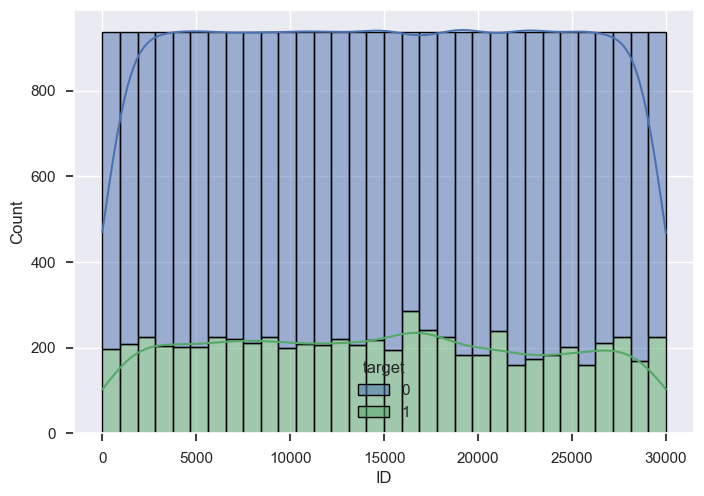

For column  LIMIT_BAL
q75:  240000.0
q25:  50000.0
Inter Quartile Range:  190000.0
Outliers lie before -235000.0 and beyond 525000.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 167




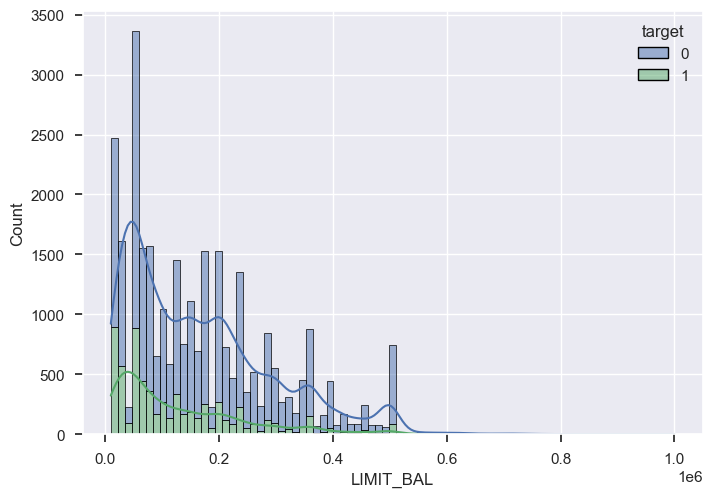

For column  AGE
q75:  41.0
q25:  28.0
Inter Quartile Range:  13.0
Outliers lie before 8.5 and beyond 60.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 272




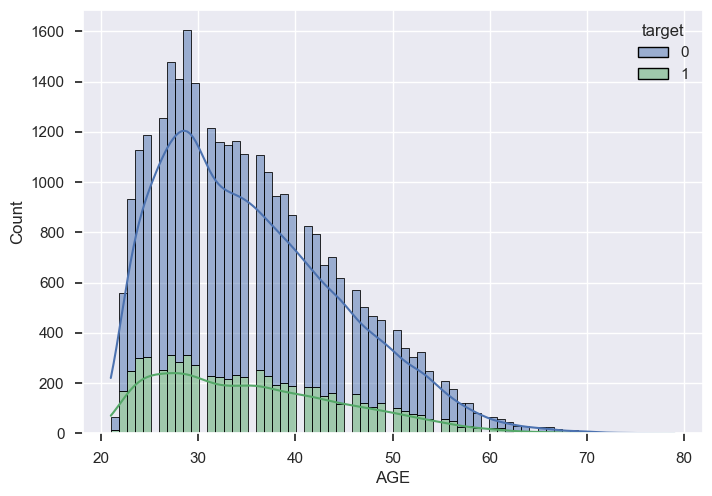

For column  BILL_AMT1
q75:  67091.0
q25:  3558.75
Inter Quartile Range:  63532.25
Outliers lie before -91739.625 and beyond 162389.375
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 2398




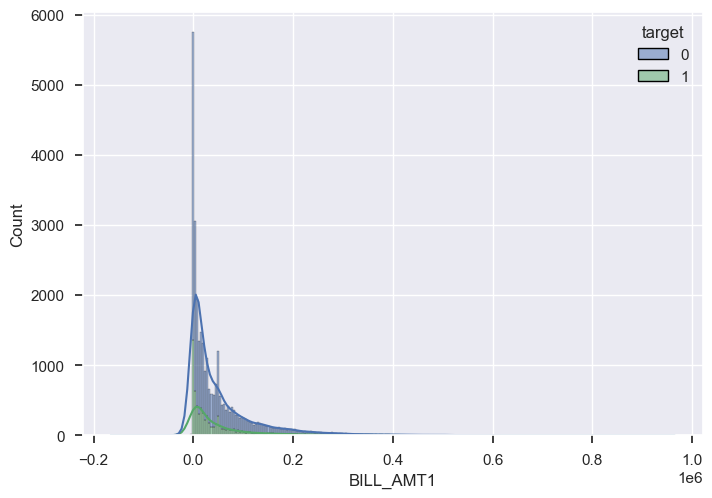

For column  BILL_AMT2
q75:  64006.25
q25:  2984.75
Inter Quartile Range:  61021.5
Outliers lie before -88547.5 and beyond 155538.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 2395




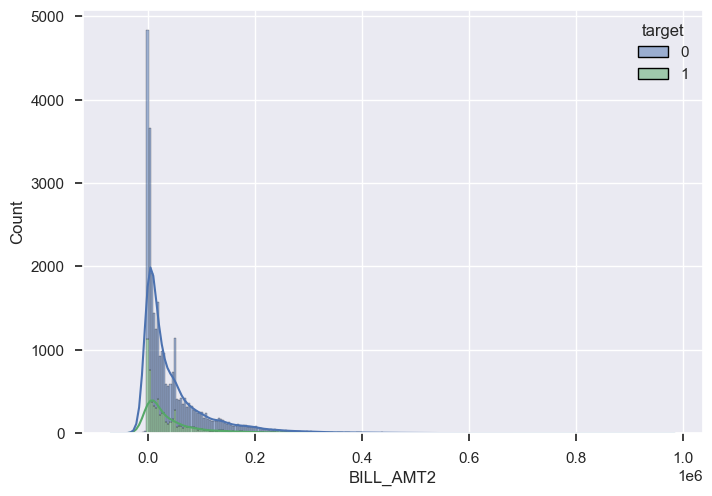

For column  BILL_AMT3
q75:  60164.75
q25:  2666.25
Inter Quartile Range:  57498.5
Outliers lie before -83581.5 and beyond 146412.5
Number of Rows with Left Extreme Outliers: 1
Number of Rows with Right Extreme Outliers: 2468




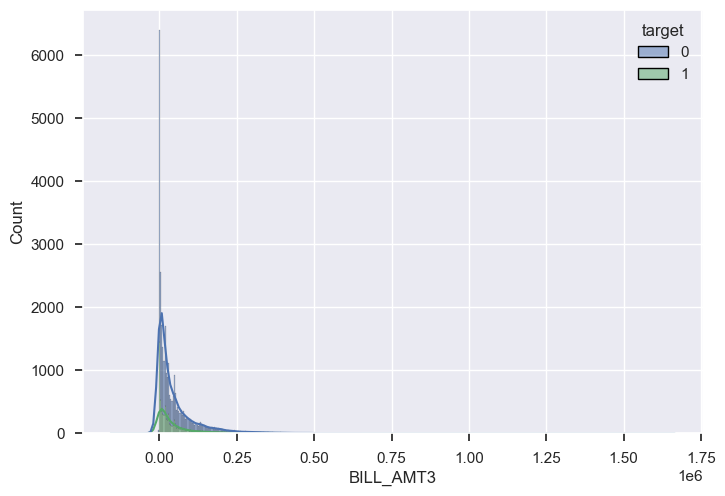

For column  BILL_AMT4
q75:  54506.0
q25:  2326.75
Inter Quartile Range:  52179.25
Outliers lie before -75942.125 and beyond 132774.875
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 2620




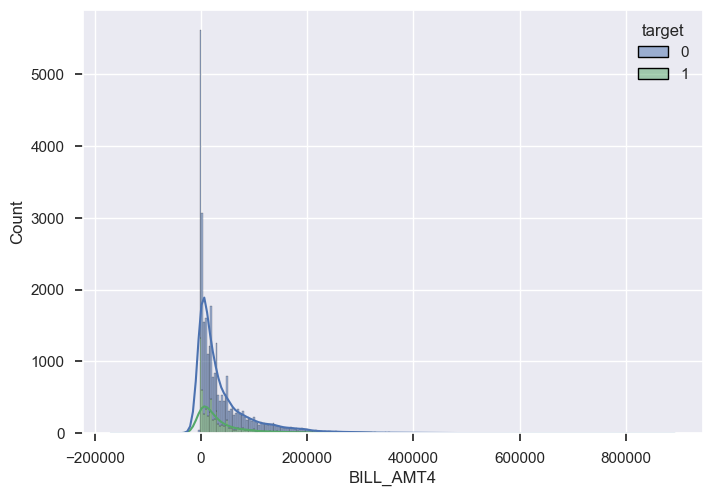

For column  BILL_AMT5
q75:  50190.5
q25:  1763.0
Inter Quartile Range:  48427.5
Outliers lie before -70878.25 and beyond 122831.75
Number of Rows with Left Extreme Outliers: 1
Number of Rows with Right Extreme Outliers: 2724




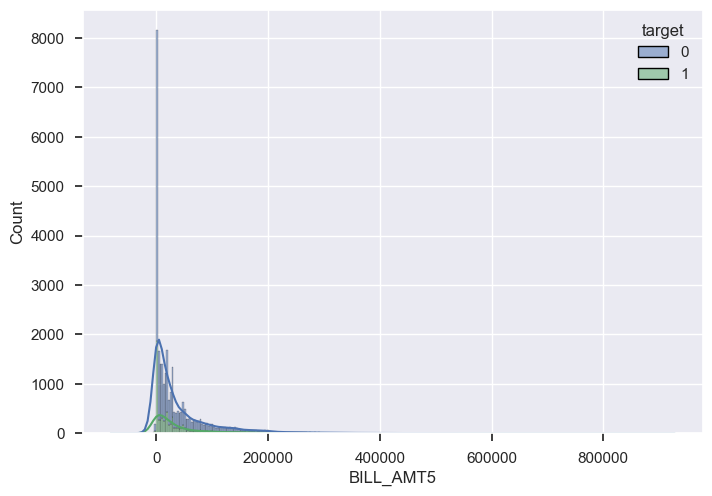

For column  BILL_AMT6
q75:  49198.25
q25:  1256.0
Inter Quartile Range:  47942.25
Outliers lie before -70657.375 and beyond 121111.625
Number of Rows with Left Extreme Outliers: 5
Number of Rows with Right Extreme Outliers: 2688




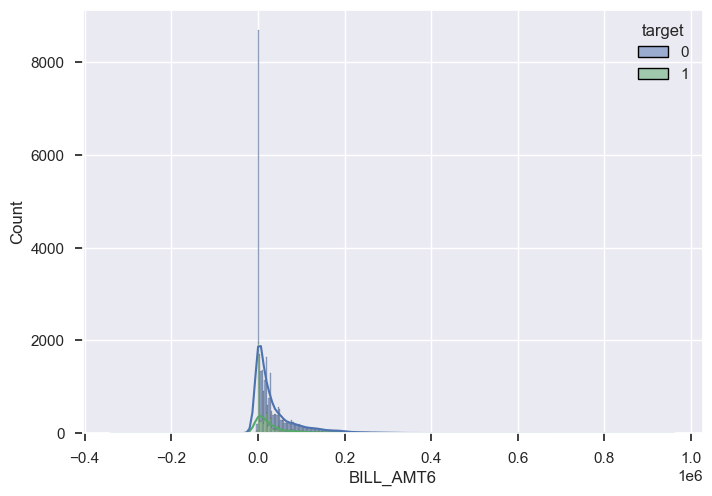

For column  PAY_AMT1
q75:  5006.0
q25:  1000.0
Inter Quartile Range:  4006.0
Outliers lie before -5009.0 and beyond 11015.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 2745


For column  PAY_AMT2
q75:  5000.0
q25:  833.0
Inter Quartile Range:  4167.0
Outliers lie before -5417.5 and beyond 11250.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 2714


For column  PAY_AMT3
q75:  4505.0
q25:  390.0
Inter Quartile Range:  4115.0
Outliers lie before -5782.5 and beyond 10677.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 2598


For column  PAY_AMT4
q75:  4013.25
q25:  296.0
Inter Quartile Range:  3717.25
Outliers lie before -5279.875 and beyond 9589.125
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 2994


For column  PAY_AMT5
q75:  4031.5
q25:  252.5
Inter Quartile Range:  3779.0
Outliers lie before -5416.0 and beyond 970

In [613]:
outliers(data_cont)

In [58]:
# removing outliers based on 1.5* inter-quatile range
p1=outlier_functions(data_cont,data)
p1.outliers_mapping()
p1.outlier_list

{'ID': [-14998.5, 44999.5],
 'LIMIT_BAL': [-235000.0, 525000.0],
 'AGE': [8.5, 60.5],
 'BILL_AMT1': [-91739.625, 162389.375],
 'BILL_AMT2': [-88547.5, 155538.5],
 'BILL_AMT3': [-83581.5, 146412.5],
 'BILL_AMT4': [-75942.125, 132774.875],
 'BILL_AMT5': [-70878.25, 122831.75],
 'BILL_AMT6': [-70657.375, 121111.625],
 'PAY_AMT1': [-5009.0, 11015.0],
 'PAY_AMT2': [-5417.5, 11250.5],
 'PAY_AMT3': [-5782.5, 10677.5],
 'PAY_AMT4': [-5279.875, 9589.125],
 'PAY_AMT5': [-5416.0, 9700.0],
 'PAY_AMT6': [-5705.625, 9823.375]}

In [59]:
data= p1.remove_outliers()
data

,target,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,Female,Graduate,Married,24,Payment Delayed,Payment Delayed,Paid Duly,Paid Duly,Paid Duly,Paid Duly,3913,0,689,0,0,0,0
1,1,120000,Female,Graduate,Others,26,Paid Duly,Payment Delayed,Paid Duly,Paid Duly,Paid Duly,Payment Delayed,2682,0,1000,1000,1000,0,2000
2,0,90000,Female,Graduate,Others,34,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,29239,1518,1500,1000,1000,1000,5000
3,0,50000,Female,Graduate,Married,37,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,46990,2000,2019,1200,1100,1069,1000
5,0,50000,Male,Graduate,Others,37,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,64400,2500,1815,657,1000,1000,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,1,210000,Male,Graduate,Married,34,Payment Delayed,Payment Delayed,Payment Delayed,Payment Delayed,Payment Delayed,Payment Delayed,2500,0,0,0,0,0,0
29992,0,10000,Male,Others,Married,43,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,8802,2000,0,0,0,0,0
29994,1,80000,Male,Graduate,Others,34,Payment Delayed,Payment Delayed,Payment Delayed,Payment Delayed,Payment Delayed,Payment Delayed,72557,7000,3500,0,7000,0,4000
29996,0,150000,Male,Others,Others,43,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,1683,1837,3526,8998,129,0,0


In [184]:
data_wo_OHE= copy.deepcopy(data)  # no one hot encoding deep copy 
data_wo_OHE['SEX']= np.where(data_wo_OHE['SEX']  == 'Male', 1, 0)
data_wo_OHE['EDUCATION'] = np.where(data_wo_OHE['EDUCATION']  == 'Graduate', 1, 0)
data_wo_OHE['MARRIAGE']= np.where(data_wo_OHE['MARRIAGE']  == 'Marriage', 1, 0)
data_wo_OHE['PAY_0']= np.where(data_wo_OHE['PAY_0']  == 'Payment Delayed', 1, 0)
data_wo_OHE['PAY_2']=np.where(data_wo_OHE['PAY_2']  == 'Payment Delayed', 1, 0)
data_wo_OHE['PAY_3']=np.where(data_wo_OHE['PAY_3']  == 'Payment Delayed', 1, 0)
data_wo_OHE['PAY_4']=np.where(data_wo_OHE['PAY_4']  == 'Payment Delayed', 1, 0)
data_wo_OHE['PAY_5']=np.where(data_wo_OHE['PAY_5']  == 'Payment Delayed', 1, 0)
data_wo_OHE['PAY_6']=np.where(data_wo_OHE['PAY_6']  == 'Payment Delayed', 1, 0)

data_wo_OHE

,target,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,0,1,0,24,1,1,0,0,0,0,3913,0,689,0,0,0,0
1,1,120000,0,1,0,26,0,1,0,0,0,1,2682,0,1000,1000,1000,0,2000
2,0,90000,0,1,0,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000
3,0,50000,0,1,0,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000
5,0,50000,1,1,0,37,0,0,0,0,0,0,64400,2500,1815,657,1000,1000,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,1,210000,1,1,0,34,1,1,1,1,1,1,2500,0,0,0,0,0,0
29992,0,10000,1,0,0,43,0,0,0,0,0,0,8802,2000,0,0,0,0,0
29994,1,80000,1,1,0,34,1,1,1,1,1,1,72557,7000,3500,0,7000,0,4000
29996,0,150000,1,0,0,43,0,0,0,0,0,0,1683,1837,3526,8998,129,0,0


#### Boxplots after removing outliers

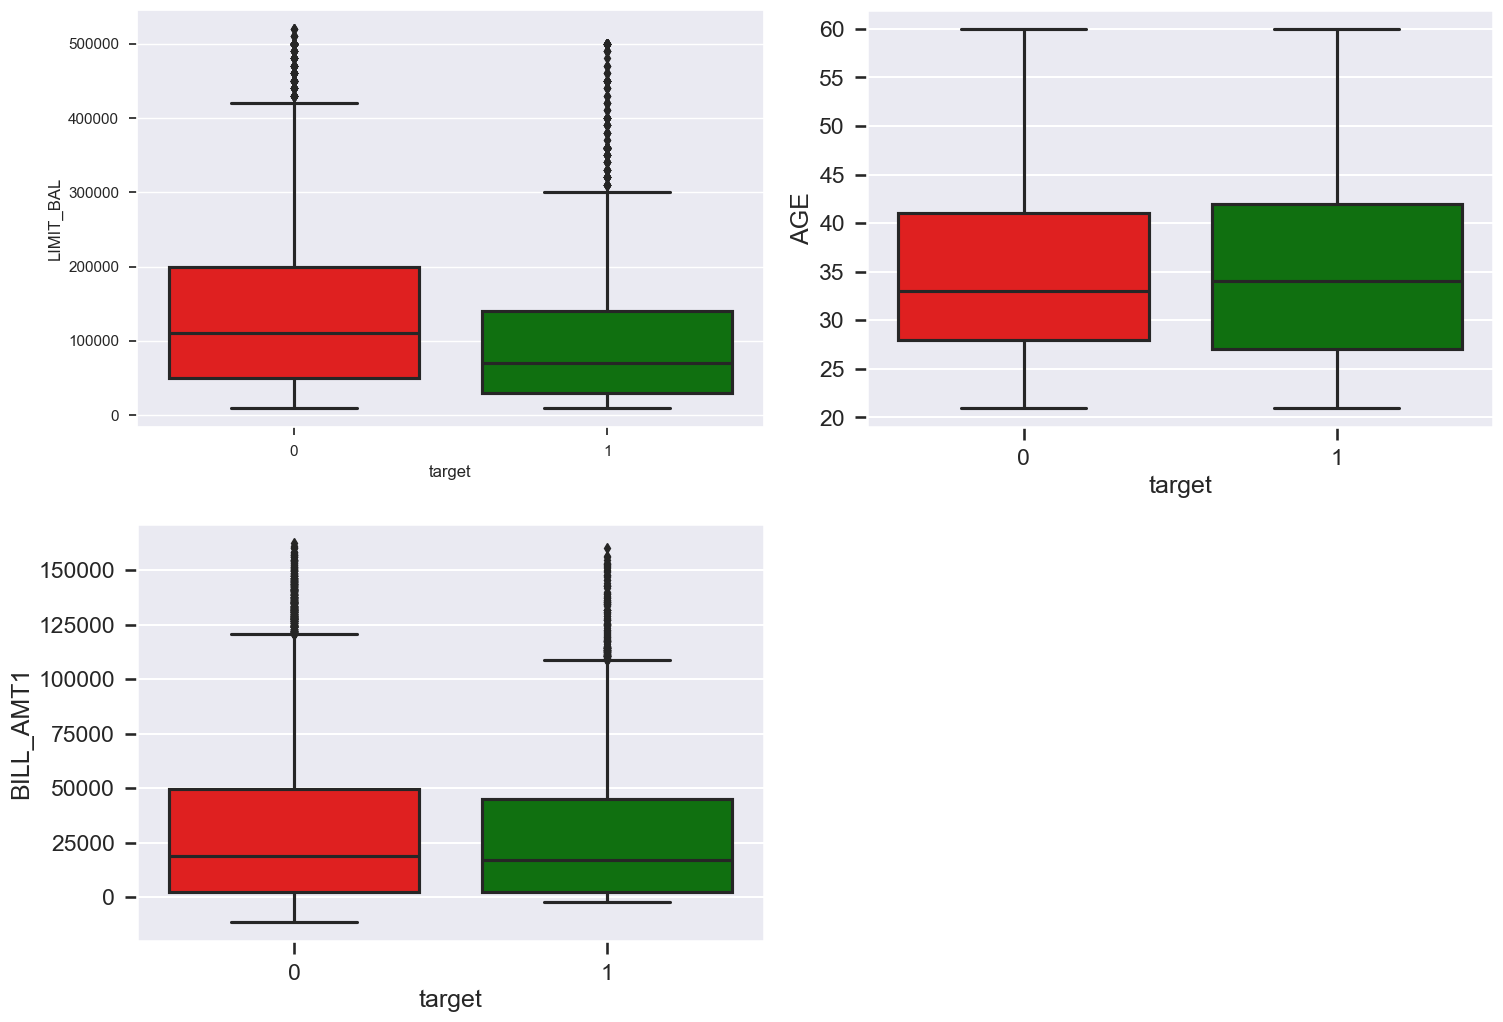

In [61]:
oe=['r','g']
fig = plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="LIMIT_BAL",x='target',palette=oe)


plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="AGE",x='target',palette=oe)

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="BILL_AMT1",x='target',palette=oe)



C:\Users\anand\AppData\Local\Temp\ipykernel_17908\2137814963.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,2,1)
C:\Users\anand\AppData\Local\Temp\ipykernel_17908\2137814963.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,2,2)
C:\Users\anand\AppData\Local\Temp\ipykernel_17908\2137814963.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently

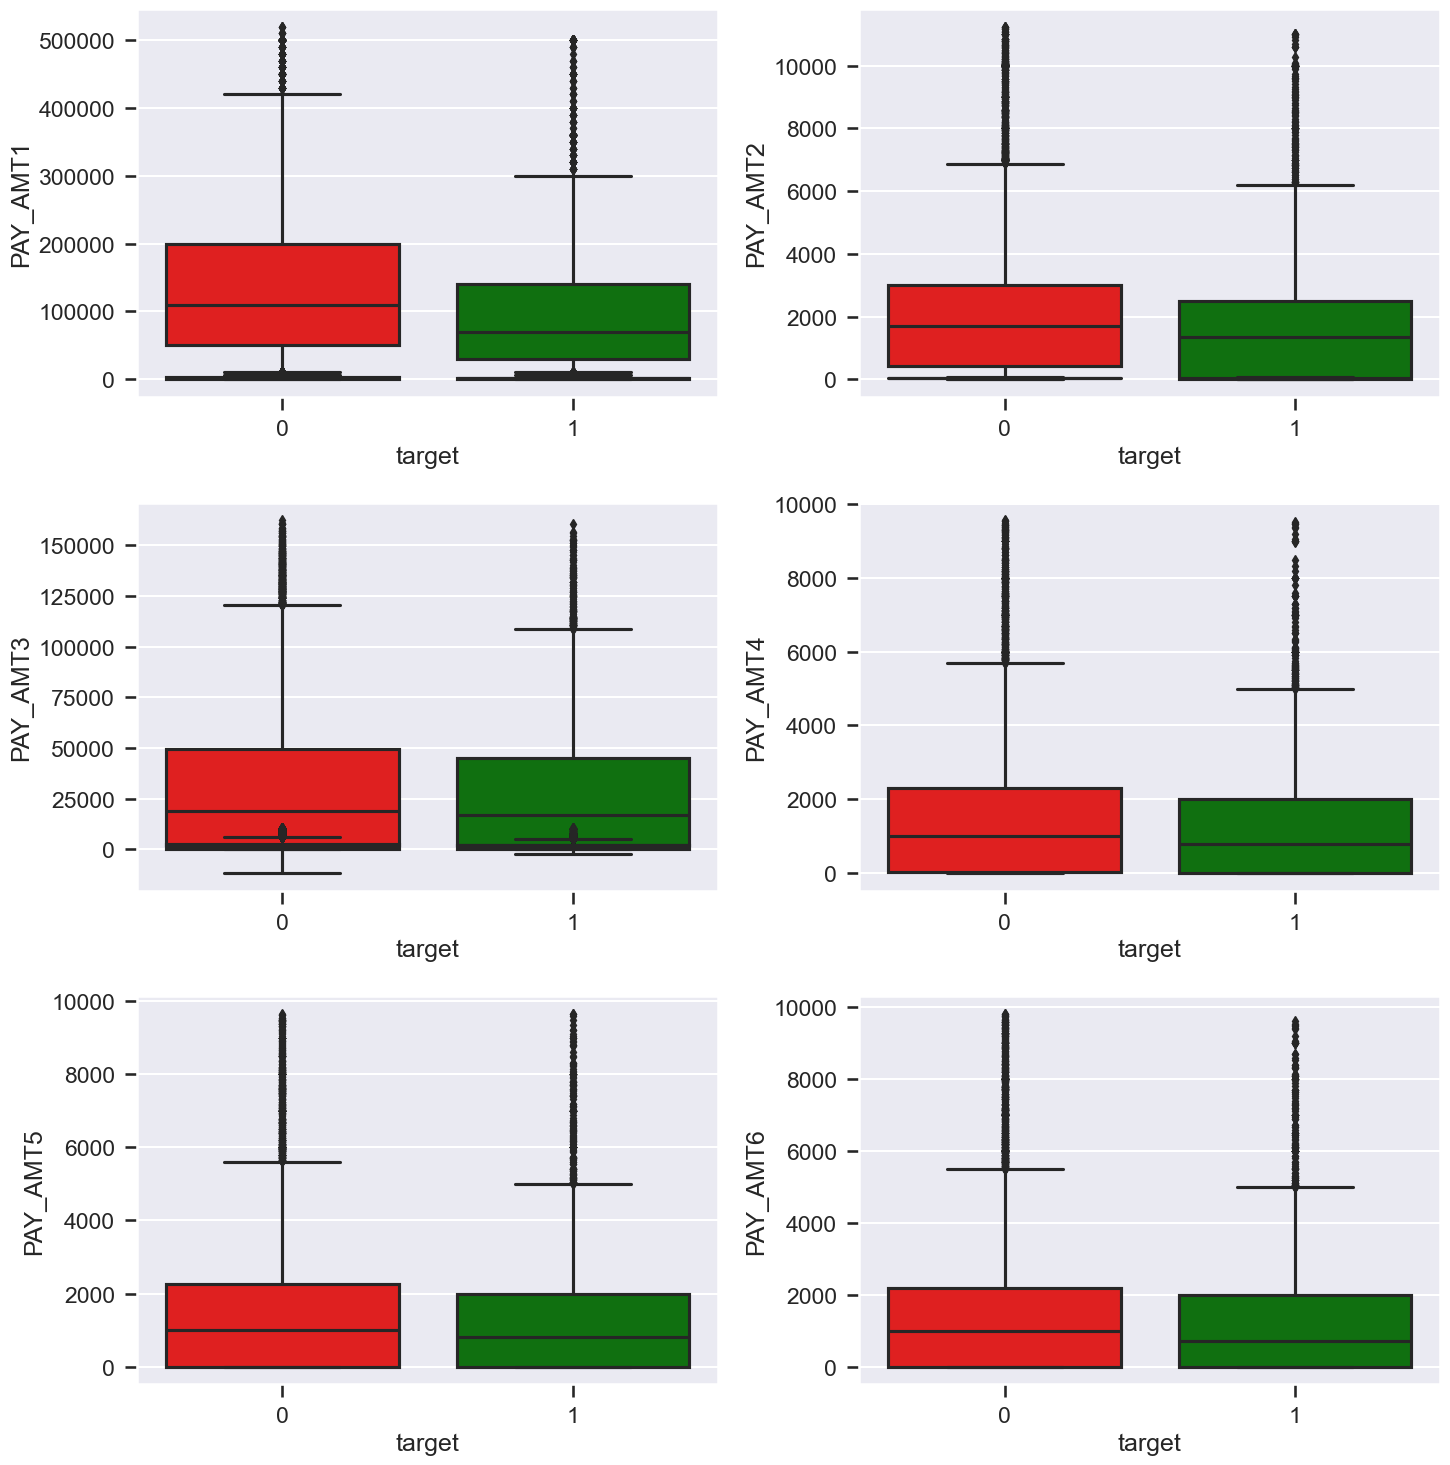

In [62]:
oe=['r','g']
fig = plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="LIMIT_BAL",x='target',palette=oe)


plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="AGE",x='target',palette=oe)

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="BILL_AMT1",x='target',palette=oe)




plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT1",x='target',palette=oe)


plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT2",x='target',palette=oe)


plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT3",x='target',palette=oe)


plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT4",x='target',palette=oe)


plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT5",x='target',palette=oe)

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT6",x='target',palette=oe)
plt.show()

In [63]:
#OHE ( One hot encoding )
data_OHE= pd.get_dummies(data,columns=k,drop_first=True)
data_OHE.head()

,target,LIMIT_BAL,AGE,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_Male,EDUCATION_Others,MARRIAGE_Others,PAY_0_Payment Delayed,PAY_2_Payment Delayed,PAY_3_Payment Delayed,PAY_4_Payment Delayed,PAY_5_Payment Delayed,PAY_6_Payment Delayed
0,1,20000,24,3913,0,689,0,0,0,0,0,0,0,1,1,0,0,0,0
1,1,120000,26,2682,0,1000,1000,1000,0,2000,0,0,1,0,1,0,0,0,1
2,0,90000,34,29239,1518,1500,1000,1000,1000,5000,0,0,1,0,0,0,0,0,0
3,0,50000,37,46990,2000,2019,1200,1100,1069,1000,0,0,0,0,0,0,0,0,0
5,0,50000,37,64400,2500,1815,657,1000,1000,800,1,0,1,0,0,0,0,0,0


In [64]:
# renaming output variable to 'Target'
raw_data.pop('ID')
target= raw_data.pop('default payment next month')
raw_data.insert(0, 'target', target)
raw_data.head()

,target,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,1,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


## Imbalance dataset 

In [173]:
### Function to under smaple and over sample 

In [174]:
def imbalance_sampling (X,column_name) :

    class_0_count,class_1_count=X[column_name].value_counts()
    minority,majority = min(class_0_count,class_1_count),max(class_0_count,class_1_count)
    #class_count={'class_0_count':class_0_count,'class_1_count':class_1_count}
    
    dict_find=dict(X[column_name].value_counts())
    majority_data= X[X[column_name]==list(dict_find.values()).index(majority)]
    minority_data = X[X[column_name]==list(dict_find.values()).index(minority)]
    
    # --------------------- under_sampling
    data_sampled_majority= majority_data.sample(minority)
    undersampled_data=pd.concat([data_sampled_majority,minority_data],axis=0)
    
    #------------------------------ over sampling
    data_sampled_minority= minority_data.sample(majority,replace=True)

    oversampled_data=pd.concat([data_sampled_minority,majority_data],axis=0)
    
    return undersampled_data,oversampled_data
    

In [526]:
# sampling for data - not one hot encoded 
undersampled_data_wo_OHE,oversampled_data_wo_OHE=imbalance_sampling(data_wo_OHE,'target')

In [532]:
#Before samping
data_wo_OHE['target'].value_counts()

0    14503
1     5044
Name: target, dtype: int64

In [533]:
#After under sampling
undersampled_data_wo_OHE['target'].value_counts()

1    5044
0    5044
Name: target, dtype: int64

In [534]:
# After over sampling
oversampled_data_wo_OHE['target'].value_counts()

1    14503
0    14503
Name: target, dtype: int64

In [213]:
# sampling for raw_data 
undersampled_raw,oversampled_raw=imbalance_sampling(raw_data,'target')

In [179]:
# sampling for data one hot encoded 
undersampled_data_OHE,oversampled_data_OHE=imbalance_sampling(data_OHE,'target')

## ML Algorigthms

### Logistic regrssion 

###### Functionalities : 
           1) Scaling {Normalize , Standardize} 
           2) Regularization {Lasso, Ridge}
           3) Hyperparameter Tuning (Thresholds)
           4) Confusion Matrix
           5) Evaluation Metrics
           6) Sampling {Under sampling , over sampling}

In [90]:
class LogisticRegression :
        
    def __init__(self, X,y,learningRate,epsilon,maxIteration,lamda=0.05, reg=False,scaling=True,threshold=0.5)->None:
        self.X=X
        self.y=y
        self.epsilon=epsilon
        self.learningRate=learningRate
        self.maxIteration=maxIteration
        self.lamda=lamda
        self.reg=reg
        self.scaling = scaling
        self.threshold=threshold
       
    

    def addX0(self, X):
        return np.column_stack([np.ones(X.shape[0]),X])
    

    def trainTestSplit(self):
        train_X,test_X,train_Y,test_Y=train_test_split(self.X,self.y,
                                                       test_size=0.3,
                                                       random_state=0)
        return train_X, test_X,train_Y,test_Y
    
   
    def normalize(self,X):
        mean=np.mean(X,0)
        sd=np.std(X,0)
        maxm=np.max(X,0)
        if self.scaling :
            X_norm=(X-mean)/(sd)
      #  X_norm=self.addX0(X_norm)
            return X_norm, mean, sd,maxm
        else : 
            X_norm = X/maxm
            return X_norm, mean, sd, maxm
        
    # Using parameters of train to normalize test set
    def normalizeTestData(self, X, trainMean,trainSd):
            X_norm=(X-trainMean)/(trainSd)
            #X_norm=self.addX0(X_norm)
            return X_norm
    
    def scaleTestData(self,X,maximum) :
        X_norm=X/self.maxm
        return X_norm
    
            

    def sigmoid(self, z):
        self.sig = 1 / (1 + np.exp(-z))
        return self.sig

    def predict(self, X):
        return X.dot(self.w)

    def costFunction(self, X, y):
      #log Loss
        sig = self.sigmoid(self.predict(X))
        loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig))
        cost = -loss.sum()
        return cost

    def costDerivative(self, X, y):
        sig = self.sigmoid(self.predict(X))
        if self.reg == 'Ridge' :
            grad= (sig - y).dot(X) + 2*self.lamda*(self.w)
            self.abcd=grad
        elif self.reg == 'Lasso' : 
            grad= (sig - y).dot(X) + abs(self.lamda)*np.ones(X.shape[1], dtype = np.float64)
        
        else : 
            grad = (sig - y).dot(X)
        
        return grad

    def gradientDescent(self, X, y):
        errors = []
        last = float('inf')

        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.costDerivative(X,y)
            
            current = self.costFunction(X,y)

            diff = abs(last - current)
            errors.append(current)
            last = current

            if diff < self.epsilon:
                print("the model stopped learning")
                break
            
       # self.plot_cost(errors)

    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)

        self.precision = (y & y_hat).sum() / y_hat.sum()
        self.recall = (y & y_hat).sum() / y.sum()

        f_score = 2 * self.precision  * self.recall / (self.precision  + self.recall)
        return round(f_score,2), round(self.precision,2), round(self.recall,2)
    

    
    def fit(self):
        self.train_X, self.test_X, self.train_Y, self.test_Y = self.trainTestSplit()
        self.train_X,self.mean,self.sd,self.maxm=self.normalize(self.train_X)
        if self.scaling :
            self.test_X=self.normalizeTestData(self.test_X, self.mean, self.sd)
        else : 
            self.test_X=self.scaleTestData(self.test_X, self.maxm)
            
        self.train_X = self.addX0(self.train_X)
        self.test_X = self.addX0(self.test_X) 
        self.w = np.ones(self.train_X.shape[1], dtype = np.float64)
       
        
        self.gradientDescent( self.train_X, self.train_Y)

        self.y_hat1 = self.sigmoid(self.predict(self.test_X))
        threshold_calc = lambda x : x >= self.threshold
        y_hat = np.array(1*threshold_calc(self.y_hat1)) 
        self.f_score, self.precision, self.recall = self.evaluate(self.test_Y,y_hat)
        self.confusion_mat =pd.DataFrame(confusion_matrix(self.test_Y,y_hat,labels=[0,1]))
        
          print ("The score was {}  and \
           Precision was {}  and Recall was {}".format(self.f_score, self.precision, self.recall))
      #  self.plot3D()
    
        #print(precision_score(self.test_Y,y_hat))
       
    

##### Logsitics regression on raw data

In [253]:
lr = LogisticRegression (X=raw_data.values[:,1:] ,y=raw_data.values[:,0],threshold=0.5,  epsilon=0.04e-7,learningRate=0.1e-5,maxIteration=10000,lamda=0.05, reg= False ,scaling=False) 
lr.fit()

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:13<00:00, 731.81it/s]

The score was 0.25  and            Precision was 0.72  and Recall was 0.15


In [255]:
algo_type ='No_data_processing'
threshold = str(0.5)
evaluate={'F_score' : {lr.__class__.__name__ + "(" + threshold + ")" + ' - '+ algo_type : lr.f_score},
 'Precision' : {lr.__class__.__name__ +"(" + threshold + ")" + ' - '+ algo_type: lr.precision},
          'Recall' : {lr.__class__.__name__ + "(" + threshold + ")" +' - '+ algo_type: lr.recall}}
evaluate=pd.DataFrame(evaluate)

In [254]:
lr.confusion_mat

,0,1
0,6948,112
1,1647,293


#### Logsitic Reg : {scaling : Normalized} { Threshold : 0.5} {Regularization : No} {One hot encoded : Yes}

In [187]:
lr1 = LogisticRegression (X=data_OHE.values[:,1:] ,y=data_OHE.values[:,0],threshold=0.5,  epsilon=0.04e-7,learningRate=0.1e-5,maxIteration=10000,lamda=0.05, reg= False ,scaling=False) 
lr1.fit()

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1048.03it/s]

The score was 0.43  and            Precision was 0.65  and Recall was 0.32


In [188]:
algo_type ='{scaling : Normalized} { Threshold : 0.5} {Reg : No} {One hot encoding : Yes}'
evaluate1={'F_score' : {lr1.__class__.__name__ + ' - '+ algo_type: lr1.f_score},
 'Precision' : {lr1.__class__.__name__ + ' - '+ algo_type: lr1.precision},'Recall' : {lr1.__class__.__name__ + ' - '+ algo_type: lr1.recall}}

evaluate1=pd.DataFrame(evaluate1)

In [256]:
lr1.confusion_mat

,0,1
0,4080,259
1,1038,488


#### Logsitic Reg : {scaling : Standardized} { Threshold : 0.5} {Reg: No} {One hot encoded : Yes}

In [190]:
lr2 = LogisticRegression (X=data_OHE.values[:,1:] ,y=data_OHE.values[:,0],threshold=0.5,  epsilon=0.04e-7,learningRate=0.1e-5,maxIteration=10000,lamda=0.05, reg= False ,scaling=True) 
lr2.fit()

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1001.44it/s]

The score was 0.43  and            Precision was 0.66  and Recall was 0.32


In [193]:
algo_type ='{scaling : Standarized} { Threshold : 0.5} {Reg : No} {One hot encoded : Yes}'
evaluate2={'F_score' : {lr2.__class__.__name__ + ' - '+ algo_type: lr2.f_score},
 'Precision' : {lr2.__class__.__name__ + ' - '+ algo_type: lr2.precision},'Recall' : {lr2.__class__.__name__ + ' - '+ algo_type: lr2.recall}}
evaluate2= pd.DataFrame(evaluate2)

In [258]:
lr2.confusion_mat

,0,1
0,4087,252
1,1044,482


#### Logsitic Reg : {scaling : Standardized} { Threshold : 0.3} {Regularization : Lasso} {One hot encoded : Yes}

In [194]:
lr3 = LogisticRegression (X=data_OHE.values[:,1:] ,y=data_OHE.values[:,0],threshold=0.3,  epsilon=0.04e-7,learningRate=0.1e-5,maxIteration=10000,lamda=0.05, reg= 'Lasso' ,scaling=True) 
lr3.fit()

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1006.51it/s]

The score was 0.56  and            Precision was 0.54  and Recall was 0.59


In [195]:
algo_type ='{scaling : Standarized} { Threshold : 0.3} {Reg : Lasso} {One hot encoded : Yes}'
evaluate3={'F_score' : {lr3.__class__.__name__ + ' - '+ algo_type: lr3.f_score},
 'Precision' : {lr3.__class__.__name__ + ' - '+ algo_type: lr3.precision},'Recall' : {lr3.__class__.__name__ + ' - '+ algo_type: lr3.recall}}
evaluate3= pd.DataFrame(evaluate3)

In [259]:
lr3.confusion_mat

,0,1
0,3568,771
1,633,893


#### Logsitic Reg : {scaling : Standardized} { Threshold : 0.3} {Regularization : Ridge} {One hot encoded : Yes}

In [197]:
lr4 = LogisticRegression (X=data_OHE.values[:,1:] ,y=data_OHE.values[:,0],threshold=0.3,  epsilon=0.04e-7,learningRate=0.1e-5,maxIteration=10000,lamda=0.05, reg= 'Ridge' ,scaling=True) 
lr4.fit()

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1048.37it/s]

The score was 0.56  and            Precision was 0.54  and Recall was 0.59


In [198]:
algo_type ='{scaling : Standarized} { Threshold : 0.3} {Regularization : Ridge} {One hot encoded : Yes}'
evaluate4={'F_score' : {lr4.__class__.__name__ + ' - '+ algo_type: lr4.f_score},
 'Precision' : {lr4.__class__.__name__ + ' - '+ algo_type: lr4.precision},'Recall' : {lr4.__class__.__name__ + ' - '+ algo_type: lr4.recall}}
evaluate4= pd.DataFrame(evaluate4)

In [260]:
lr4.confusion_mat

,0,1
0,3568,771
1,633,893


#### Logsitic Reg : {scaling : Standardized} { Threshold : 0.5} {Regularization : Lasso} {One hot encoded : Yes}

In [200]:
lr5 = LogisticRegression (X=data_OHE.values[:,1:] ,y=data_OHE.values[:,0],threshold=0.5,  epsilon=0.04e-7,learningRate=0.1e-5,maxIteration=10000,lamda=0.05, reg= 'Lasso' ,scaling=True) 
lr5.fit()

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:10<00:00, 989.23it/s]

The score was 0.43  and            Precision was 0.66  and Recall was 0.32


In [201]:
algo_type ='{scaling : Standarized} { Threshold : 0.5} {Reg : Lasso} {One hot encoded : Yes}'
evaluate5={'F_score' : {lr5.__class__.__name__ + ' - '+ algo_type: lr5.f_score},
 'Precision' : {lr5.__class__.__name__ + ' - '+ algo_type: lr5.precision},'Recall' : {lr5.__class__.__name__ + ' - '+ algo_type: lr5.recall}}
evaluate5= pd.DataFrame(evaluate5)

In [261]:
lr5.confusion_mat

,0,1
0,4087,252
1,1044,482


#### Logsitic Reg : {scaling : Standardized} { Threshold : 0.5} {Regularization : Ridge} {One hot encoded : Yes}

In [202]:
lr6 = LogisticRegression (X=data_OHE.values[:,1:] ,y=data_OHE.values[:,0],threshold=0.5,  epsilon=0.04e-7,learningRate=0.1e-5,maxIteration=10000,lamda=0.05, reg= 'Ridge' ,scaling=True) 
lr6.fit()

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1024.88it/s]

The score was 0.43  and            Precision was 0.66  and Recall was 0.32


In [203]:
algo_type ='{scaling : Standarized} { Threshold : 0.5} {Reg : Ridge} {One hot encoded : Yes}'
evaluate6={'F_score' : {lr6.__class__.__name__ + ' - '+ algo_type: lr6.f_score},
 'Precision' : {lr6.__class__.__name__ + ' - '+ algo_type: lr6.precision},'Recall' : {lr6.__class__.__name__ + ' - '+ algo_type: lr6.recall}}
evaluate6= pd.DataFrame(evaluate6)

In [262]:
lr6.confusion_mat

,0,1
0,4087,252
1,1044,482


#### Logsitic Reg : {scaling : Standardized} { Threshold : 0.3} {Reg : Ridge} {One hot encoded : Yes} {sampling = Under_sampled}

In [204]:
lr7 = LogisticRegression (X=undersampled_data_OHE.values[:,1:] ,y=undersampled_data_OHE.values[:,0],threshold=0.3,  epsilon=0.04e-7,learningRate=0.1e-5,maxIteration=10000,lamda=0.05, reg= 'Ridge' ,scaling=True) 
lr7.fit()

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1776.33it/s]

The score was 0.7  and            Precision was 0.56  and Recall was 0.94


In [226]:
algo_type ='{scaling : Standarized} { Threshold : 0.3} {Reg : Ridge} {One hot encoded : Yes} {Sampling : Under}'
evaluate7={'F_score' : {lr7.__class__.__name__ + ' - '+ algo_type: lr7.f_score},
 'Precision' : {lr7.__class__.__name__ + ' - '+ algo_type: lr7.precision},'Recall' : {lr7.__class__.__name__ + ' - '+ algo_type: lr7.recall}}
evaluate7= pd.DataFrame(evaluate7)

In [263]:
lr7.confusion_mat

,0,1
0,399,1109
1,97,1422


#### Logsitic Reg : {scaling : Standardized} { Threshold : 0.5} {Regularization : Ridge} {One hot encoded : Yes} {sampling = Over_sampled}

In [208]:
lr8 = LogisticRegression (X=oversampled_data_OHE.values[:,1:] ,y=oversampled_data_OHE.values[:,0],threshold=0.33,  epsilon=0.04e-7,learningRate=0.1e-5,maxIteration=10000,lamda=0.05, reg= 'Ridge' ,scaling=True) 
lr8.fit()

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:13<00:00, 721.29it/s]

The score was 0.7  and            Precision was 0.59  and Recall was 0.88


In [223]:
algo_type ='{scaling : Standarized} { Threshold : 0.5} {Reg : Lasso} {One hot encoded : Yes}'
evaluate8={'F_score' : {lr8.__class__.__name__ + ' - '+ algo_type: lr8.f_score},
 'Precision' : {lr8.__class__.__name__ + ' - '+ algo_type: lr8.precision},'Recall' : {lr8.__class__.__name__ + ' - '+ algo_type: lr8.recall}}
evaluate8= pd.DataFrame(evaluate8)

In [264]:
lr8.confusion_mat

,0,1
0,1666,2694
1,514,3828


#### Logsitic Reg : {scaling : Standardized} { Threshold : 0.3} {Regularization : No } {One hot encoded : No} {sampling = under_sampled}

In [220]:
lr9 = LogisticRegression (X=undersampled_raw.values[:,1:] ,y=undersampled_raw.values[:,0],threshold=0.3,  epsilon=0.04e-7,learningRate=0.1e-5,maxIteration=10000,lamda=0.05, reg= False,scaling=False) 
lr9.fit()

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1457.80it/s]

The score was 0.67  and            Precision was 0.53  and Recall was 0.92


In [632]:
algo_type ='{scaling : Standarized} { Threshold : 0.3} {Reg : Lasso} {One hot encoded : Yes}'
evaluate9={'F_score' : {lr9.__class__.__name__ + ' - '+ algo_type: lr9.f_score},
 'Precision' : {lr9.__class__.__name__ + ' - '+ algo_type: lr9.precision},'Recall' : {lr9.__class__.__name__ + ' - '+ algo_type: lr9.recall}}
evaluate9= pd.DataFrame(evaluate9)

In [265]:
lr9.confusion_mat

,0,1
0,234,1700
1,158,1890


In [633]:
lr_eval= pd.concat([evaluate,evaluate1,evaluate2,evaluate3,evaluate4,evaluate5,evaluate6,evaluate7,evaluate8,evaluate9],axis=0)

In [634]:
lr_eval.sort_values(by=['Recall','F_score'],ascending =False)

,F_score,Precision,Recall
LogisticRegression - {scaling : Standarized} { Threshold : 0.3} {Reg : Ridge} {One hot encoded : Yes} {Sampling : Under},0.70,0.56,0.94
LogisticRegression - {scaling : Standarized} { Threshold : 0.3} {Reg : Lasso} {One hot encoded : Yes},0.67,0.53,0.92
LogisticRegression - {scaling : Standarized} { Threshold : 0.5} {Reg : Lasso} {One hot encoded : Yes},0.70,0.59,0.88
LogisticRegression - {scaling : Standarized} { Threshold : 0.3} {Reg : Lasso} {One hot encoded : Yes},0.56,0.54,0.59
LogisticRegression - {scaling : Standarized} { Threshold : 0.3} {Regularization : Ridge} {One hot encoded : Yes},0.56,0.54,0.59
LogisticRegression - {scaling : Normalized} { Threshold : 0.5} {Reg : No} {One hot encoding : Yes},0.43,0.65,0.32
LogisticRegression - {scaling : Standarized} { Threshold : 0.5} {Reg : No} {One hot encoded : Yes},0.43,0.66,0.32
LogisticRegression - {scaling : Standarized} { Threshold : 0.5} {Reg : Lasso} {One hot encoded : Yes},0.43,0.66,0.32
LogisticRegression - {scaling : Standarized} { Threshold : 0.5} {Reg : Ridge} {One hot encoded : Yes},0.43,0.66,0.32
LogisticRegression(0.5) - No_data_processing,0.25,0.72,0.15


### Naive Bayes

In [270]:
import numpy as np
class NaiveBayes:
    def __init__(self,X,y) : 
        self.X=X
        self.y=y

    def fit(self):
        n_samples, n_features = self.X.shape
        self._classes = np.unique(self.y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        self.train_X,self.test_X,self.train_Y,self.test_Y= self.trainTestSplit()
        
        for idx, c in enumerate(self._classes):
            X_c = self.X[self.y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            
        
        y_pred = np.array ([self._predict(x) for x in self.test_X] )
        self.f_score, self.precision, self.recall = self.evaluate(self.test_Y,y_pred)
        self.confusion_mat =pd.DataFrame(confusion_matrix(self.test_Y,y_pred,labels=[0,1]))
        print("Naive Bayes classification accuracy", self.accuracy(self.test_Y, y_pred))
        
            
    def trainTestSplit(self):
        train_X,test_X,train_Y,test_Y=train_test_split(self.X,self.y,
                                                       test_size=0.3,
                                                       random_state=0)
        return train_X, test_X,train_Y,test_Y
    
    def predict(self):
        y_pred = [self._predict(x) for x in self.test_X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


    def accuracy(self,y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)

        self.precision = (y & y_hat).sum() / y_hat.sum()
        self.recall = (y & y_hat).sum() / y.sum()

        f_score = 2 * self.precision  * self.recall / (self.precision  + self.recall)
        return round(f_score,2), round(self.precision,2), round(self.recall,2)

#### Naive Bayes {One hot encoded : No} {Sampling : Under}

In [275]:
Nb=NaiveBayes(undersampled_raw.values[:,1:], undersampled_raw.values[:,0])
Nb.fit()

Naive Bayes classification accuracy 0.6278252134605726


C:\Users\anand\AppData\Local\Temp\ipykernel_17908\3692280327.py:48: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x)))


In [276]:
 algo_type ='{One hot encoded : No} {Sampling : Under}'
nb={'F_score' : {Nb.__class__.__name__ + ' - '+ algo_type: Nb.f_score},
 'Precision' : {Nb.__class__.__name__ + ' - '+ algo_type: Nb.precision},'Recall' : {Nb.__class__.__name__ + ' - '+ algo_type: Nb.recall}}
nb= pd.DataFrame(nb)

In [272]:
Nb.confusion_mat

,0,1
0,860,1074
1,408,1640


#### Naive Bayes {One hot encoded : Yes} {Sampling : Under}

In [277]:
Nb1=NaiveBayes(undersampled_data_OHE.values[:,1:], undersampled_data_OHE.values[:,0])
Nb1.fit()

Naive Bayes classification accuracy 0.6769078295341923


In [278]:
 algo_type ='{One hot encoded : Yes} {Sampling : Under}'
nb_eval1={'F_score' : {Nb1.__class__.__name__ + ' - '+ algo_type: Nb1.f_score},
 'Precision' : {Nb1.__class__.__name__ + ' - '+ algo_type: Nb1.precision},'Recall' : {Nb1.__class__.__name__ + ' - '+ algo_type: Nb1.recall}}
nb_eval1= pd.DataFrame(nb_eval1)

In [279]:
Nb1.confusion_mat

,0,1
0,1236,272
1,706,813


#### Naive Bayes {One hot encoded : No} {Sampling : No} 

In [280]:
Nb2=NaiveBayes(raw_data.values[:,1:], raw_data.values[:,0])
Nb2.fit()

C:\Users\anand\AppData\Local\Temp\ipykernel_17908\3692280327.py:48: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x)))


Naive Bayes classification accuracy 0.7172222222222222


In [281]:
 algo_type ='{One hot encoded : No} {Sampling : No}'
nb_eval2={'F_score' : {Nb2.__class__.__name__ + ' - '+ algo_type: Nb2.f_score},
 'Precision' : {Nb2.__class__.__name__ + ' - '+ algo_type: Nb2.precision},'Recall' : {Nb2.__class__.__name__ + ' - '+ algo_type: Nb2.recall}}
nb_eval2= pd.DataFrame(nb_eval2)

In [283]:
Nb2.confusion_mat

,0,1
0,5210,1850
1,695,1245


#### Naive Bayes {One hot encoded : Yes} {Sampling : No} 

In [287]:
Nb3=NaiveBayes(data_OHE.values[:,1:], data_OHE.values[:,0])
Nb3.fit()

Naive Bayes classification accuracy 0.7563512361466326


In [663]:
 algo_type ='{One hot encoded : Yes} {Sampling : No}'
nb_eval3={'F_score' : {Nb3.__class__.__name__ + ' - '+ algo_type: Nb3.f_score},
 'Precision' : {Nb3.__class__.__name__ + ' - '+ algo_type: Nb3.precision},'Recall' : {Nb3.__class__.__name__ + ' - '+ algo_type: Nb3.recall}}
nb_eval3= pd.DataFrame(nb_eval3)

In [656]:
Nb3.confusion_mat

,0,1
0,3678,661
1,768,758


#### Naive Bayes {One hot encoded : No} {Sampling : Over}

In [300]:
Nb4=NaiveBayes(oversampled_raw.values[:,1:], oversampled_raw.values[:,0])
Nb4.fit()

C:\Users\anand\AppData\Local\Temp\ipykernel_17908\3692280327.py:48: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x)))


Naive Bayes classification accuracy 0.5958342249803837


In [658]:
 algo_type ='{One hot encoded : No} {Sampling : Over}'
nb_eval4={'F_score' : {Nb4.__class__.__name__ + ' - '+ algo_type: Nb4.f_score},
 'Precision' : {Nb4.__class__.__name__ + ' - '+ algo_type: Nb4.precision},'Recall' : {Nb4.__class__.__name__ + ' - '+ algo_type: Nb4.recall}}
nb_eval4= pd.DataFrame(nb_eval4)

In [302]:
Nb4.confusion_mat

,0,1
0,2378,4652
1,1014,5975


In [664]:
nb_eval_total=pd.concat([nb,nb_eval1,nb_eval2,nb_eval3,nb_eval4],axis=0)

In [665]:
nb_eval_total

,F_score,Precision,Recall
NaiveBayes - {One hot encoded : No} {Sampling : Under},0.69,0.60,0.80
NaiveBayes - {One hot encoded : Yes} {Sampling : Under},0.62,0.75,0.54
NaiveBayes - {One hot encoded : No} {Sampling : No},0.49,0.40,0.64
NaiveBayes - {One hot encoded : Yes} {Sampling : No},0.51,0.53,0.50
NaiveBayes - {One hot encoded : No} {Sampling : Over},0.68,0.56,0.85


### SVM 

In [424]:
class SVM:

    def __init__(self,X,Y, learning_rate=0.0001, lambda_param=0.001, n_iters=100):
        self.X = X
        self.y= np.where(Y <= 0, -1, 1)
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    
    def trainTestSplit(self):
        train_X,test_X,train_Y,test_Y=train_test_split(self.X,self.y,
                                                       test_size=0.3,
                                                       random_state=0)
        return train_X, test_X,train_Y,test_Y
    

    def fit(self):
        self.train_X, self.test_X, self.train_Y, self.test_Y = self.trainTestSplit()
        
        n_samples, n_features = self.train_X.shape

        # init weights
        self.w = np.zeros(n_features)
        self.b = 0
        
        errors = []
        for _ in tqdm(range(self.n_iters)):
            error = 0
            for idx, x_i in enumerate(self.train_X):
                condition = self.train_Y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, self.train_Y[idx]))
                    self.b -= self.lr * self.train_Y[idx]
            errors.append(error)
            
        predicted= self.predict(self.test_X)
        
        self.f_score, self.precision, self.recall = self.evaluate(self.test_Y,predicted)

        self.confusion_mat =pd.DataFrame(confusion_matrix(self.test_Y,predicted,labels=[-1,1]),columns=[-1,1],index=[-1,1])
        print ( 'The accuracy is ' ,self.accuracy(self.test_Y,predicted ) )
        print ('F_Score : ' ,self.f_score, 'Precision :', self.precision , 'Recall:',self.recall)

    def predict(self,X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)
    
    def accuracy(self,y_true, y_pred):
            accuracy = np.sum(y_true == y_pred) / len(y_true)
            return accuracy
        
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)

        self.precision = (y & y_hat).sum() / y_hat.sum()
        self.recall = (y & y_hat).sum() / y.sum()

        self.f_score = 2 * self.precision  * self.recall / (self.precision  + self.recall)
        return round(self.f_score,2), round(self.precision,2), round(self.recall,2)
  

#### SVM {One hot encoded : Yes} {Sampling : No}

In [416]:
svm1=SVM(data_OHE.values[:,1:],data_OHE.values[:,0])
svm1.fit()

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:32<00:00,  5.40it/s]


The accuracy is  0.383461210571185
F_Score :  0.37 Precision : 0.25 Recall: 0.68


In [402]:
 algo_type ='{One hot encoded : Yes} {Sampling : No}'
svm_1={'F_score' : {svm1.__class__.__name__ + ' - '+ algo_type: svm1.f_score},
 'Precision' : {svm1.__class__.__name__ + ' - '+ algo_type: svm1.precision},'Recall' : {svm1.__class__.__name__ + ' - '+ algo_type: svm1.recall}}
svm_1= pd.DataFrame(svm_1)

In [403]:
svm1.confusion_mat

,-1,1
-1,1274,3065
1,518,1008


#### SVM {One hot encoded : No} {Sampling : No} { raw_data}

In [425]:
svm2=SVM(raw_data.values[:,1:],np.where(raw_data.values[:,0] <= 0, -1, 1))
svm2.fit()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:26<00:00,  3.79it/s]

The accuracy is  0.6476666666666666
F_Score :  0.35 Precision : 0.29 Recall: 0.44


In [426]:
 algo_type ='One hot encoded : No} {Sampling : No} { raw_data}'
svm_2={'F_score' : {svm2.__class__.__name__ + ' - '+ algo_type: svm2.f_score},
 'Precision' : {svm2.__class__.__name__ + ' - '+ algo_type: svm2.precision},'Recall' : {svm2.__class__.__name__ + ' - '+ algo_type: svm2.recall}}
svm_2= pd.DataFrame(svm_2)

In [427]:
svm2.confusion_mat

,-1,1
-1,4966,2094
1,1077,863


#### SVM {One hot encoded : Yes} {Sampling : under}

In [407]:
svm3=SVM(undersampled_data_OHE.values[:,1:],np.where(undersampled_data_OHE.values[:,0] <= 0, -1, 1))
svm3.fit()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.84it/s]

The accuracy is  0.5322101090188305
F_Score :  0.52 Precision : 0.54 Recall: 0.5


In [408]:
 algo_type ='{One hot encoded : Yes} {Sampling : under}'
svm_3={'F_score' : {svm3.__class__.__name__ + ' - '+ algo_type: svm3.f_score},
 'Precision' : {svm3.__class__.__name__ + ' - '+ algo_type: svm3.precision},'Recall' : {svm3.__class__.__name__ + ' - '+ algo_type: svm3.recall}}
svm_3= pd.DataFrame(svm_3)

In [409]:
svm3.confusion_mat

,-1,1
-1,854,654
1,762,757


#### SVM {One hot encoded : Yes} {Sampling : Over}

In [414]:
svm4=SVM(oversampled_data_OHE.values[:,1:],np.where(oversampled_data_OHE.values[:,0] <= 0, -1, 1))
svm4.fit()

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.53it/s]

The accuracy is  0.4759825327510917
F_Score :  0.56 Precision : 0.48 Recall: 0.66


In [636]:
 algo_type ='{One hot encoded : Yes} {Sampling : Over}'
svm_4={'F_score' : {svm4.__class__.__name__ + ' - '+ algo_type: svm4.f_score},
 'Precision' : {svm4.__class__.__name__ + ' - '+ algo_type: svm4.precision},'Recall' : {svm4.__class__.__name__ + ' - '+ algo_type: svm4.recall}}
svm_4= pd.DataFrame(svm_4)

In [412]:
svm4.confusion_mat

,-1,1
-1,761,3599
1,800,3542


In [637]:
svm_total=pd.concat([svm_1,svm_2,svm_3,svm_4],axis=0)
svm_total

,F_score,Precision,Recall
SVM - {One hot encoded : Yes} {Sampling : No},0.36,0.25,0.66
SVM - One hot encoded : No} {Sampling : No} { raw_data},0.35,0.29,0.44
SVM - {One hot encoded : Yes} {Sampling : under},0.52,0.54,0.50
SVM - {One hot encoded : Yes} {Sampling : Over},0.56,0.48,0.66


### Evaluation metrics for all models

In [666]:
total_eval_list=pd.concat([lr_eval,nb_eval_total,svm_total],axis=0)
total_eval_list.sort_values(by=['Recall','F_score'],ascending=False)

,F_score,Precision,Recall
LogisticRegression - {scaling : Standarized} { Threshold : 0.3} {Reg : Ridge} {One hot encoded : Yes} {Sampling : Under},0.70,0.56,0.94
LogisticRegression - {scaling : Standarized} { Threshold : 0.3} {Reg : Lasso} {One hot encoded : Yes},0.67,0.53,0.92
LogisticRegression - {scaling : Standarized} { Threshold : 0.5} {Reg : Lasso} {One hot encoded : Yes},0.70,0.59,0.88
NaiveBayes - {One hot encoded : No} {Sampling : Over},0.68,0.56,0.85
NaiveBayes - {One hot encoded : No} {Sampling : Under},0.69,0.60,0.80
SVM - {One hot encoded : Yes} {Sampling : Over},0.56,0.48,0.66
SVM - {One hot encoded : Yes} {Sampling : No},0.36,0.25,0.66
NaiveBayes - {One hot encoded : No} {Sampling : No},0.49,0.40,0.64
LogisticRegression - {scaling : Standarized} { Threshold : 0.3} {Reg : Lasso} {One hot encoded : Yes},0.56,0.54,0.59
LogisticRegression - {scaling : Standarized} { Threshold : 0.3} {Regularization : Ridge} {One hot encoded : Yes},0.56,0.54,0.59


#### Bias Variance trade-off

In [640]:
class LR_Bias_variance_trade_off :
        
    def __init__(self, X,y,learningRate,epsilon,maxIteration,lamda=0.05, reg=False,scaling=True,threshold=0.5,bias=False)->None:
        self.X=X
        self.y=y
        self.epsilon=epsilon
        self.learningRate=learningRate
        self.maxIteration=maxIteration
        self.lamda=lamda
        self.reg=reg
        self.scaling = scaling
        self.threshold=threshold
        self.bias =bias
       
    

    def addX0(self, X):
        return np.column_stack([np.ones(X.shape[0]),X])
    

    def trainTestSplit(self):
        train_X,test_X,train_Y,test_Y=train_test_split(self.X,self.y,
                                                       test_size=0.3,
                                                       random_state=0)
        return train_X, test_X,train_Y,test_Y
    
   
    def normalize(self,X):
        mean=np.mean(X,0)
        sd=np.std(X,0)
        maxm=np.max(X,0)
        if self.scaling :
            X_norm=(X-mean)/(sd)
      #  X_norm=self.addX0(X_norm)
            return X_norm, mean, sd,maxm
        else : 
            X_norm = X/maxm
            return X_norm, mean, sd, maxm
        
    # Using parameters of train to normalize test set
    def normalizeTestData(self, X, trainMean,trainSd):
            X_norm=(X-trainMean)/(trainSd)
            #X_norm=self.addX0(X_norm)
            return X_norm
    
    def scaleTestData(self,X,maximum) :
        X_norm=X/self.maxm
        return X_norm
    
            

    def sigmoid(self, z):
        self.sig = 1 / (1 + np.exp(-z))
        return self.sig

    def predict(self, X):
        return X.dot(self.w)

    def costFunction(self, X, y):
      #log Loss
        sig = self.sigmoid(self.predict(X))
        loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig))
        cost = -loss.sum()
        return cost

    def costDerivative(self, X, y):
        sig = self.sigmoid(self.predict(X))
        if self.reg == 'Ridge' :
            grad= (sig - y).dot(X) + 2*self.lamda*(self.w)
            self.abcd=grad
        elif self.reg == 'Lasso' : 
            grad= (sig - y).dot(X) + abs(self.lamda)*np.ones(X.shape[1], dtype = np.float64)
        
        else : 
            grad = (sig - y).dot(X)
        
        return grad

    def gradientDescent(self, X, y):
        errors = []
        last = float('inf')

        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.costDerivative(X,y)
            
            current = self.costFunction(X,y)

            diff = abs(last - current)
            errors.append(current)
            last = current

            if diff < self.epsilon:
                print("the model stopped learning")
                break
            
       # self.plot_cost(errors)
    def accuracy(self,y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)

        self.precision = (y & y_hat).sum() / y_hat.sum()
        self.recall = (y & y_hat).sum() / y.sum()

        f_score = 2 * self.precision  * self.recall / (self.precision  + self.recall)
        return round(f_score,2), round(self.precision,2), round(self.recall,2)
    

    
    def fit(self):
        self.train_X, self.test_X, self.train_Y, self.test_Y = self.trainTestSplit()
        self.train_X,self.mean,self.sd,self.maxm=self.normalize(self.train_X)
        
        if self.bias: 
            
            if self.scaling :
                self.train_X=self.normalizeTestData(self.train_X, self.mean, self.sd)
            else : 
                self.train_X=self.scaleTestData(self.train_X, self.maxm)

            self.train_X = self.addX0(self.train_X)
            self.test_X = self.addX0(self.test_X) 
            self.w = np.ones(self.train_X.shape[1], dtype = np.float64)

            self.gradientDescent( self.train_X, self.train_Y)

            self.y_hat1 = self.sigmoid(self.predict(self.train_X))
            threshold_calc = lambda x : x >= self.threshold
            y_hat = np.array(1*threshold_calc(self.y_hat1)) 
            self.f_score, self.precision, self.recall = self.evaluate(self.train_Y,y_hat)
           # self.f_score, self.precision, self.recall = self.evaluate(self.test_Y,y_hat)
            self.confusion_mat =pd.DataFrame(confusion_matrix(self.train_Y,y_hat,labels=[0,1]))
            print ("The accuracy {} score was {}  and \
               Precision was {}  and Recall was {}".format(self.accuracy(self.train_Y,y_hat),self.f_score, self.precision, self.recall))
          #  s
        else: 

            if self.scaling :
                self.test_X=self.normalizeTestData(self.test_X, self.mean, self.sd)
            else : 
                self.test_X=self.scaleTestData(self.test_X, self.maxm)

            self.train_X = self.addX0(self.train_X)
            self.test_X = self.addX0(self.test_X) 
            self.w = np.ones(self.train_X.shape[1], dtype = np.float64)


            self.gradientDescent( self.train_X, self.train_Y)

            self.y_hat1 = self.sigmoid(self.predict(self.test_X))
            threshold_calc = lambda x : x >= self.threshold
            y_hat = np.array(1*threshold_calc(self.y_hat1)) 
            self.f_score_train, self.precision, self.recall = self.evaluate(self.test_Y,y_hat)
            self.f_score, self.precision, self.recall = self.evaluate(self.test_Y,y_hat)
            self.confusion_mat =pd.DataFrame(confusion_matrix(self.test_Y,y_hat,labels=[0,1]))

            print ("The accuracy {} score was {}  and \
               Precision was {}  and Recall was {}".format(self.accuracy(self.test_Y,y_hat),self.f_score, self.precision, self.recall))
          #  self.plot3D()

            #print(precision_score(self.test_Y,y_hat))



#### underfitting -- High Bias

In [641]:
BVT= LR_Bias_variance_trade_off (X=raw_data[['LIMIT_BAL']] ,y=raw_data.values[:,0],threshold=0.3,bias=False , epsilon=0.04e-7,learningRate=0.1e-5,maxIteration=1000,lamda=0.05, reg= False,scaling=True) 
BVT.fit()

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 691.91it/s]

The accuracy 0.7621111111111111 score was 0.2  and                Precision was 0.36  and Recall was 0.14


In [642]:
BVT.confusion_mat

,0,1
0,6593,467
1,1674,266


#### Overfitting -- High Variance

In [650]:
BVT_Bias = LR_Bias_variance_trade_off (X=raw_data[['target']] ,y=raw_data.values[:,0],threshold=0.5,bias=True , epsilon=0.04e-7,learningRate=0.1e-5,maxIteration=1000,lamda=0.05, reg= False,scaling=True) 
BVT_Bias.fit()

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 621.60it/s]

The accuracy 1.0 score was 1.0  and                Precision was 1.0  and Recall was 1.0


In [651]:
BVT_Bias.confusion_mat

,0,1
0,16304,0
1,0,4696
